In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")


## 1. data information
```
Country
Year:                       Years from 2000 to 2015
Status:                     Developed or Developing status
Life expectancy:            Life Expectancy in age
Adult Mortality:            Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
infant deaths:              Number of Infant (Between 0 and 2 years) Deaths  per 1000 population
Alcohol:                    Alcohol recorded per capita (15+) consumption (in litres of pure alcohol)
percentage expenditure:     Expenditure on health as a percentage of Gross Domestic Product per capita(%)
Hepatitis B:                (HepB) immunization coverage among 1-year-olds (%)
Measles:                    number of reported cases per 1000 population
BMI:                        Average Body Mass Index of entire population (weight in kg/(height in m)^2 )
under-five deaths:          Number of under-five deaths per 1000 population
Polio:                      Polio (Pol3) immunization coverage among 1-year-olds (%)
Total expenditure:          General government expenditure on health as a percentage of total government expenditure (%)
Diphtheria:                 Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
HIV/AIDS:                   Deaths per 1 000 live births HIV/AIDS (0-4 years)
GDP:                        Gross Domestic Product per capita (in USD)
Population:                 Population of the country
thinness 1-19 years:        Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
thinness 5-9 years:         Prevalence of thinness among children for Age 5 to 9(%)
Income composition of resources:    Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
Schooling:                  Number of years of Schooling(years)
Immunization columns:       Polio,Diphtheria,Hepatitis B
```

In [2]:
# ----------------------------------- Read Life Expectancy Data ----------------------------------------------
df=pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# 1. Data Cleaning
1. Using the mean value to replace the missing data
2. Removing the duplicated data

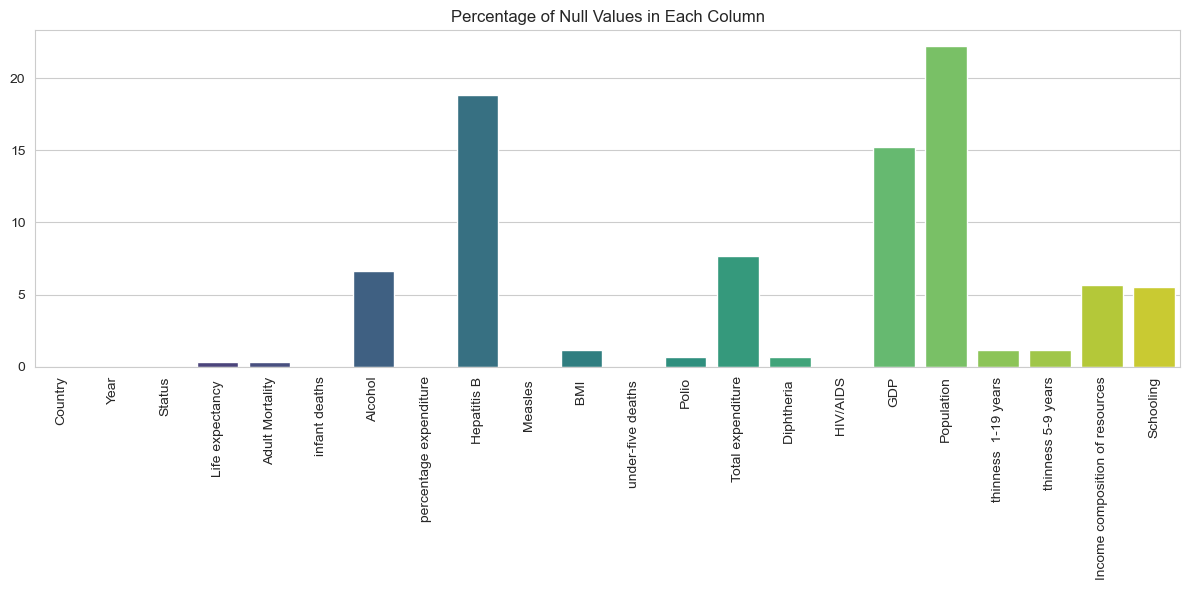

In [22]:
# ------------------------------- Data cleaning --------------------------------------------------------
missing_values_percentage = df.isnull().sum() / len(df) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values_percentage.index, y=missing_values_percentage, palette='viridis')
plt.title('Percentage of Null Values in Each Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

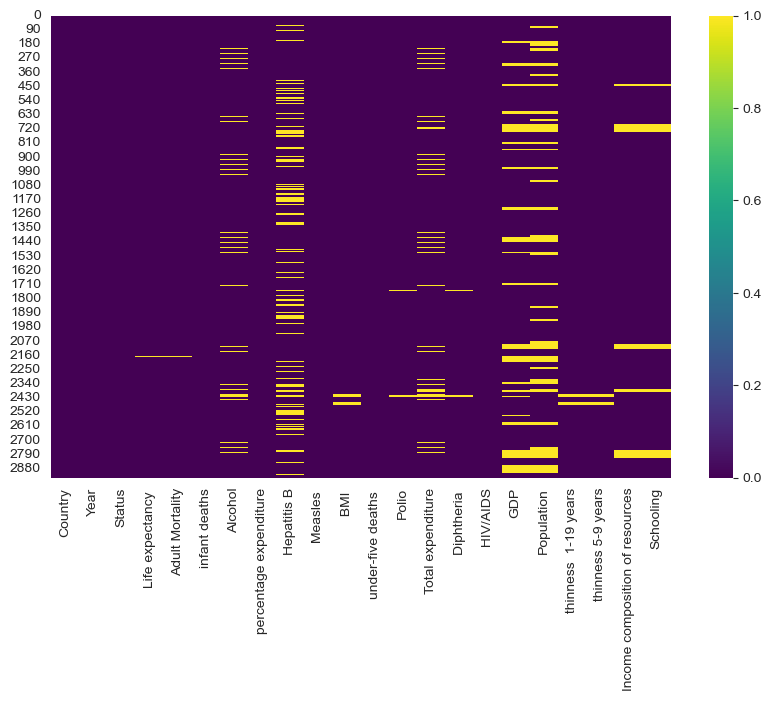

In [23]:
# ----------------------------------- Show the missing data distribution ---------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis')
# plt.xticks(rotation=30)
plt.show()

In [24]:
# Using the mean value to replace the missing data
for cols in df.columns:
    if df[cols].dtypes in ['int', 'float']:
        selected_cols = df[cols]
        cols_mean = selected_cols.mean()
        df[cols].fillna(cols_mean, inplace=True)

df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [25]:
df.duplicated().sum()

0

# 2. EDA (Exploratory data analysis)
1. Show data describe

In [26]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [27]:
# -------------------------------------------- Show the Attribute Names ---------------------------------------
num_col=[]
cat_col=[]
for col in df.columns:
    if df[col].dtype=='object':
        cat_col.append(col)
    else:
        num_col.append(col)
print(cat_col)
print(num_col)


['Country', 'Status']
['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


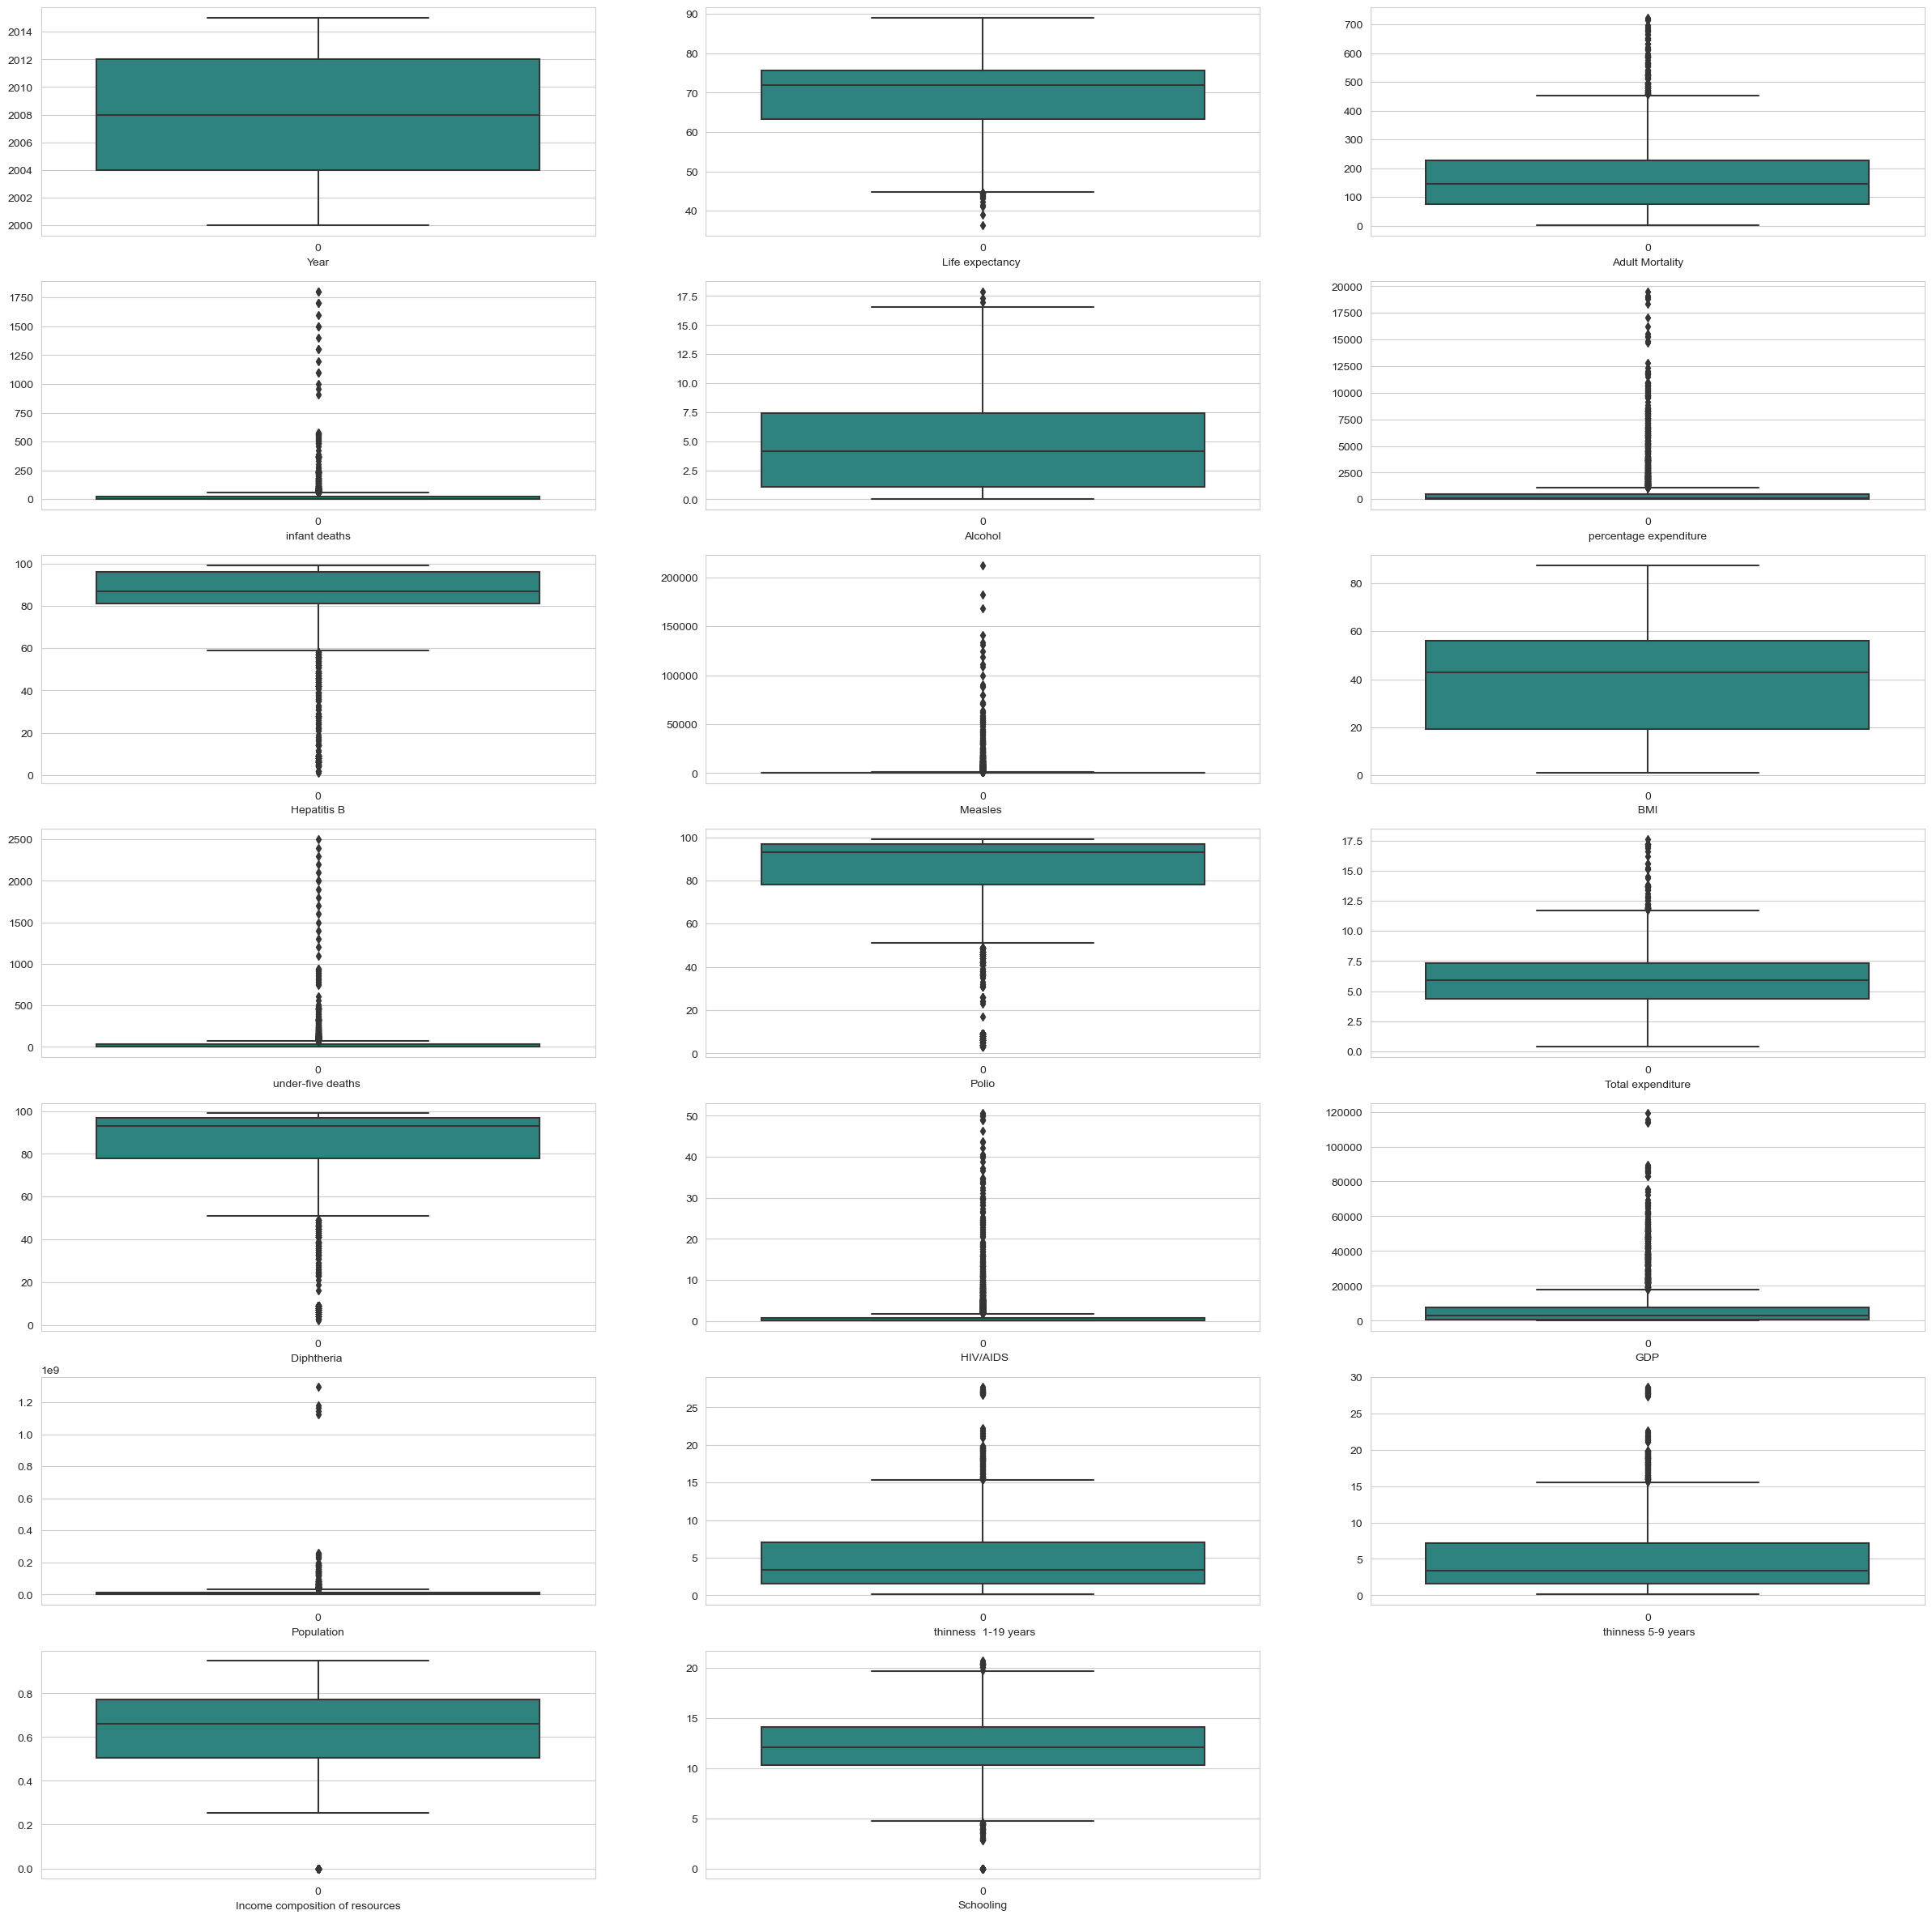

In [30]:
fig = plt.figure(figsize=(30,30))

counter = 0

for col in num_col:
    sub = fig.add_subplot(7,3,counter+1)
    g = sns.boxplot(data=df[col], palette='viridis')
    plt.xlabel(col)
    counter = counter + 1

<Axes: xlabel='Life expectancy '>

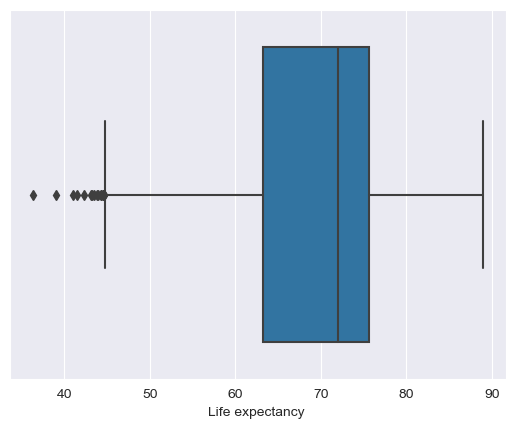

In [11]:
sns.boxplot(data=df,x='Life expectancy ',fliersize=5)

In [ ]:
sns.histplot(data=df_train,x='Lifeexpectancy')

In [ ]:
df_train[num_col].drop(columns='Year').hist(bins=20,figsize=(12,10))
plt.tight_layout()
plt.show()

In [ ]:
for col in df_train[num_col].drop(columns='Year').columns:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(df_train[col], ax=ax[0] )
    sns.boxplot(x=df_train[col], ax=ax[1] )

In [ ]:
fig,axes=plt.subplots(nrows=len(df_train[num_col].columns)//2 ,ncols=2,figsize=(20,18))
for idx,col in enumerate(df_train[num_col].drop(columns='Year').columns):
    row_idx=idx//2
    col_idx=idx%2
    sns.lineplot(x='Year',y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],markers=True,ci=None)
fig.delaxes(axes[9,1])
plt.tight_layout()
plt.show()


In [ ]:
corr = df_train.corr()
mask = np.triu(corr)
mask=mask
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()

# 3. Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()
model.add(Dense(units=22, activation='relu'))
model.add(Dense(units=22, activation='relu'))
model.add(Dense(units=22, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1)

In [ ]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=600, callbacks=[early_stop])